** 决策树基本原理 ：通过递归分裂特征空间构建树状分类模型，每个节点根据特征阈值进行分裂 

2. 模型训练与评估 ：使用鸢尾花数据集构建分类决策树，输出准确率、混淆矩阵等评估指标
3. 决策树可视化 ：直观展示树的结构、分裂条件和叶子节点的类别分布
   
4. 参数调优 ：通过网格搜索优化关键参数（最大深度、最小分裂样本数等），解决过拟合问题
   
5. 特征重要性分析 ：展示每个特征对决策的贡献程度
   
6. 决策边界可视化 **：使用前两个特征展示决策树如何划分特征空间
    
决策树的优点是解释性强（可解释为一系列 "如果 - 那么" 规则）、无需特征标准化、能处理混合类型数据。缺点是容易过拟合（可通过剪枝解决）、对噪声敏感。

特征名称: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
标签名称: ['setosa' 'versicolor' 'virginica']
数据集形状: (150, 4)
训练集大小: 105
测试集大小: 45

初始模型准确率: 1.0

混淆矩阵:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

分类报告:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



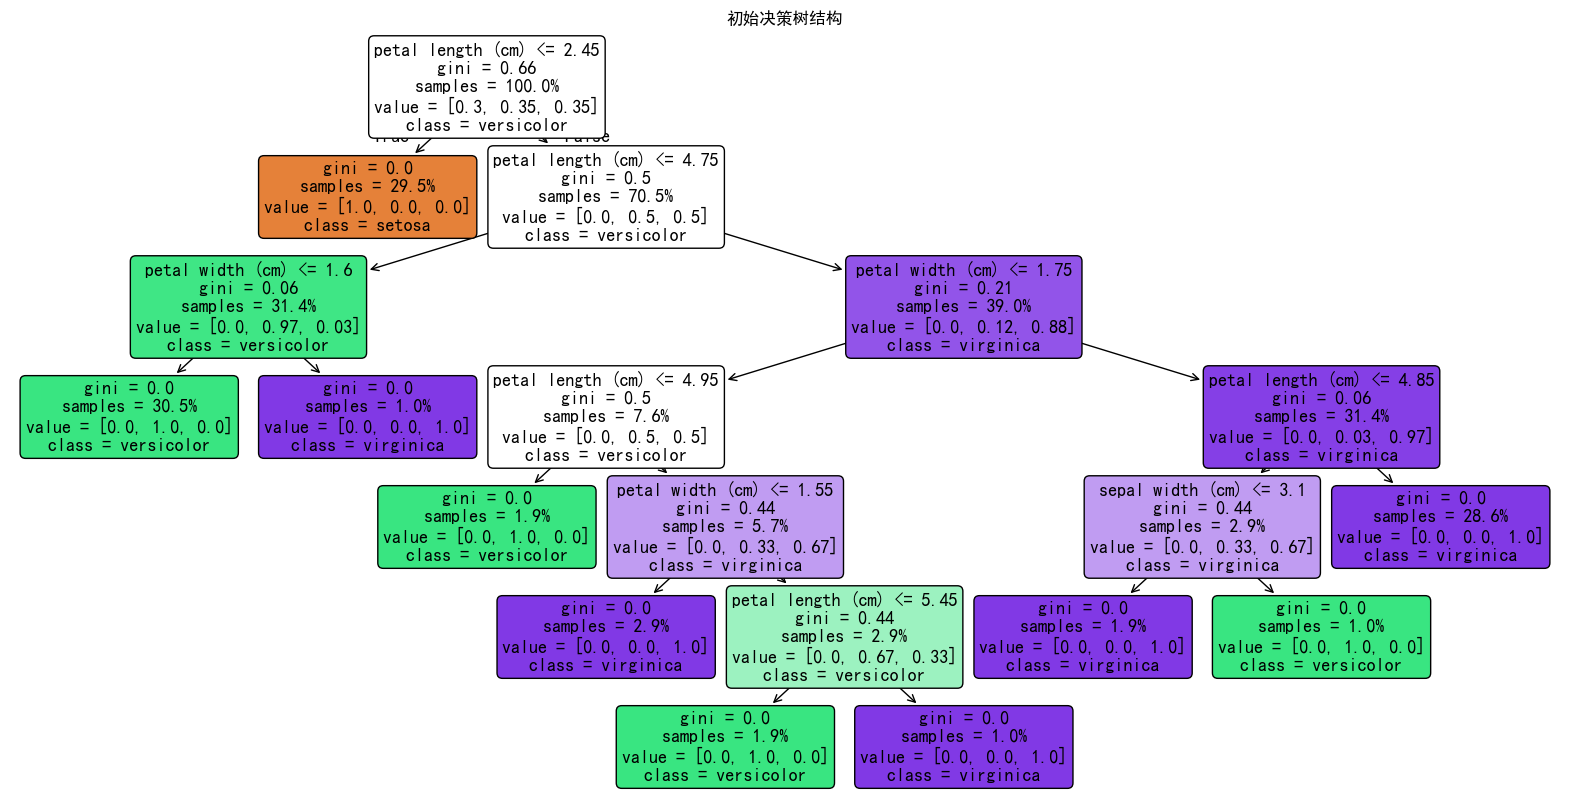


最佳参数: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 10}
最佳交叉验证准确率: 0.9429

优化后模型准确率: 1.0

优化后混淆矩阵:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

优化后分类报告:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



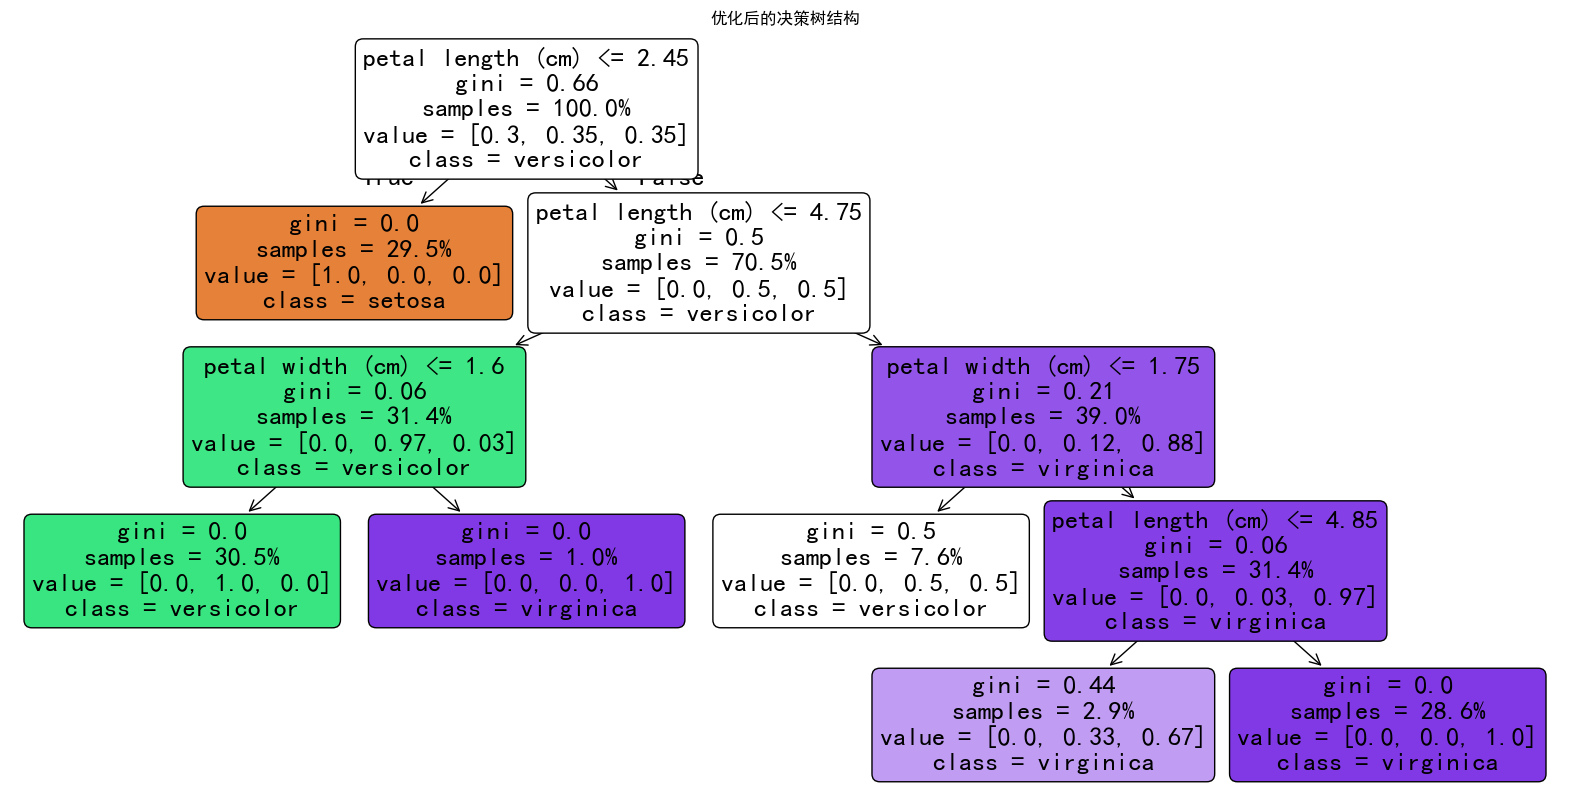

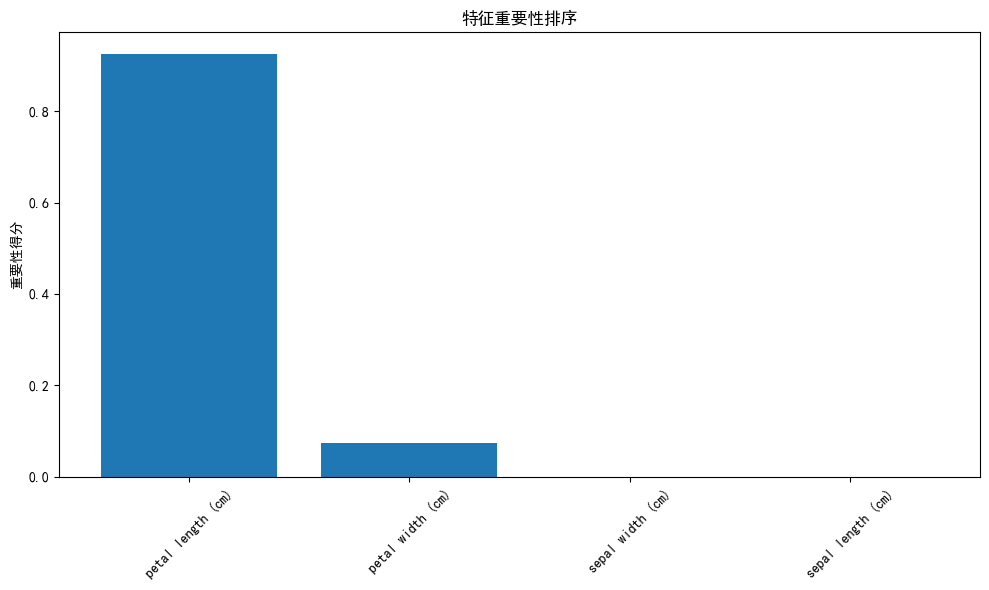

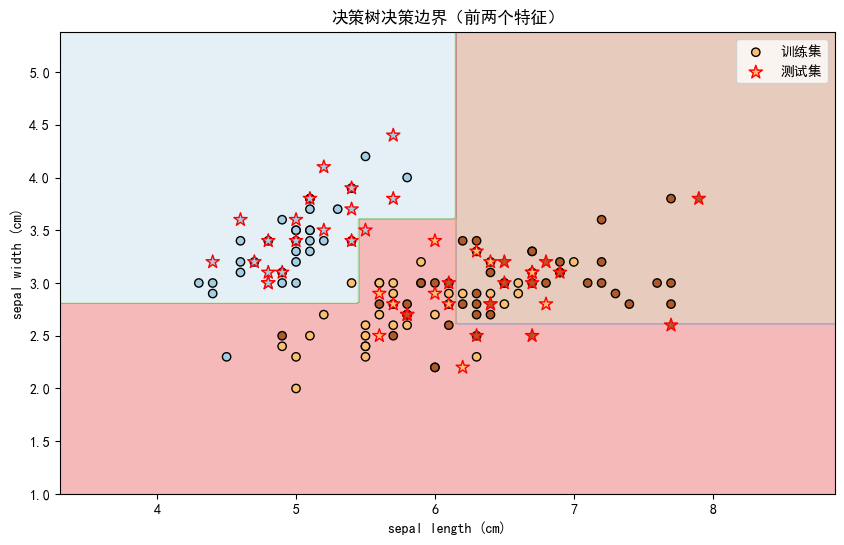


新样本预测结果: setosa


In [2]:
# 导入必要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# 设置中文显示
plt.rcParams["font.family"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False  # 解决负号显示问题

# 1. 加载数据集
iris = load_iris()
X = iris.data  # 特征数据
y = iris.target  # 标签数据

# 查看数据集信息
print("特征名称:", iris.feature_names)
print("标签名称:", iris.target_names)
print("数据集形状:", X.shape)

# 2. 划分训练集和测试集（决策树对特征尺度不敏感，可无需标准化）
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42  # 30%作为测试集
)

print(f"训练集大小: {X_train.shape[0]}")
print(f"测试集大小: {X_test.shape[0]}")

# 3. 训练基本决策树模型
# 初始模型：不限制深度，可能会过拟合
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# 4. 模型预测与初步评估
y_pred = dtree.predict(X_test)

print("\n初始模型准确率:", accuracy_score(y_test, y_pred))
print("\n混淆矩阵:\n", confusion_matrix(y_test, y_pred))
print("\n分类报告:\n", classification_report(
    y_test, y_pred, target_names=iris.target_names
))

# 5. 可视化决策树结构
plt.figure(figsize=(20, 10))
plot_tree(
    dtree,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,  # 填充颜色
    rounded=True,  # 圆角矩形
    proportion=True,  # 显示样本比例
    precision=2  # 显示精度
)
plt.title("初始决策树结构")
plt.show()

# 6. 决策树参数调优（防止过拟合）
# 尝试不同的最大深度和最小分裂样本数
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, None],  # 树的最大深度
    'min_samples_split': [2, 5, 10],  # 分裂内部节点所需的最小样本数
    'min_samples_leaf': [1, 2, 4]  # 叶节点所需的最小样本数
}

# 网格搜索寻找最佳参数
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,  # 5折交叉验证
    scoring='accuracy'
)
grid_search.fit(X_train, y_train)

print(f"\n最佳参数: {grid_search.best_params_}")
print(f"最佳交叉验证准确率: {grid_search.best_score_:.4f}")

# 7. 使用最佳参数训练模型
best_dtree = grid_search.best_estimator_
y_best_pred = best_dtree.predict(X_test)

print("\n优化后模型准确率:", accuracy_score(y_test, y_best_pred))
print("\n优化后混淆矩阵:\n", confusion_matrix(y_test, y_best_pred))
print("\n优化后分类报告:\n", classification_report(
    y_test, y_best_pred, target_names=iris.target_names
))

# 8. 可视化优化后的决策树
plt.figure(figsize=(20, 10))
plot_tree(
    best_dtree,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    proportion=True,
    precision=2
)
plt.title("优化后的决策树结构")
plt.show()

# 9. 特征重要性分析
feature_importance = best_dtree.feature_importances_
indices = np.argsort(feature_importance)[::-1]  # 按重要性排序

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importance[indices])
plt.xticks(range(X.shape[1]), [iris.feature_names[i] for i in indices], rotation=45)
plt.title("特征重要性排序")
plt.ylabel("重要性得分")
plt.tight_layout()
plt.show()

# 10. 决策边界可视化（使用前两个特征）
X_vis = X[:, :2]  # 只取前两个特征
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis, y, test_size=0.3, random_state=42
)

# 使用最佳参数训练可视化用的模型
dtree_vis = DecisionTreeClassifier(**grid_search.best_params_, random_state=42)
dtree_vis.fit(X_train_vis, y_train_vis)

# 创建网格
h = 0.02  # 网格步长
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# 预测网格点类别
Z = dtree_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 绘制决策边界
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X_train_vis[:, 0], X_train_vis[:, 1], c=y_train_vis, cmap=plt.cm.Paired, edgecolors='k', label='训练集')
plt.scatter(X_test_vis[:, 0], X_test_vis[:, 1], c=y_test_vis, cmap=plt.cm.Paired, edgecolors='red', marker='*', s=100, label='测试集')
plt.title('决策树决策边界（前两个特征）')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.show()

# 11. 新样本预测
new_sample = np.array([[5.1, 3.5, 1.4, 0.2]])  # 类似山鸢尾的特征
prediction = best_dtree.predict(new_sample)
print(f"\n新样本预测结果: {iris.target_names[prediction][0]}")